notebook for evaluating what is done in calculate_f1_score.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/var/folders/pp/c6m9_85s5rd16hbzmflk4b9r0000gn/T/ipykernel_4168/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
per_species_f1_lin = np.load('./results/f1_scores_lin.npy')
per_species_f1_log = np.load('./results/f1_scores_log.npy')

In [3]:
num_points = 19

### Analysis of linearly spaced thresholds

In [4]:
print(per_species_f1_lin.shape)
for i,score in enumerate(per_species_f1_lin.mean(axis=0)):
    print(i,score)

(2418, 19)
0 0.533841081486156
1 0.549547592634884
2 0.5473907677659648
3 0.5370177283511056
4 0.5221456149329847
5 0.5034391027568195
6 0.480975049416587
7 0.45720918892127127
8 0.4312243726482621
9 0.40272302855877345
10 0.37310041164054686
11 0.34029770587820496
12 0.30376142043359067
13 0.26521245534194576
14 0.22332906809383304
15 0.17806491554329512
16 0.12607020683898923
17 0.07274684374854734
18 0.023240361971973968


In [5]:
#theoretical maximum
per_species_f1_lin.max(axis=1).mean()

0.6496083051519287

### Analysis of log spaced thresholds

In [6]:
print(per_species_f1_log.shape)
for i, score in enumerate(per_species_f1_log.mean(axis=0)):
    print(i,score)

(2418, 19)
0 0.4574622613324284
1 0.4706159192803685
2 0.4834662780147144
3 0.4958466383370089
4 0.5074179296645202
5 0.5183047121907465
6 0.528238996135809
7 0.5367753730656798
8 0.5436031803143674
9 0.5481818884117771
10 0.550076440789467
11 0.5481923237040808
12 0.541062185106458
13 0.5275026840971456
14 0.5044288368523944
15 0.46724732839951527
16 0.41253960386723376
17 0.32907897957056853
18 0.19213623180510533


In [7]:
per_species_f1_log.max(axis=1).mean()

0.6558413432912596

In [8]:
per_species_f1_lin.max(axis=1).shape

(2418,)

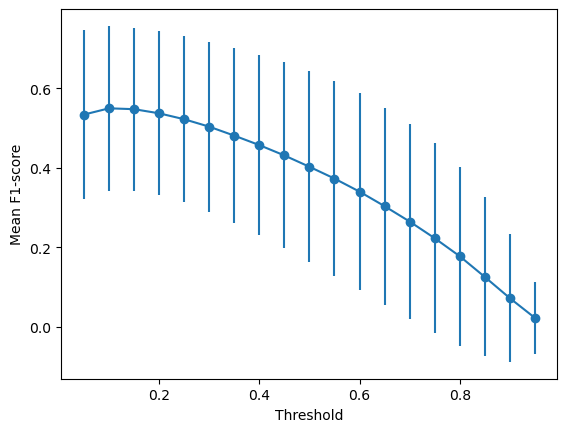

In [9]:
x1 = linspace_values = np.linspace(0.05, 1, num=num_points, endpoint=False)
y1 = per_species_f1_lin.mean(axis=0) 
error1 = per_species_f1_lin.std(axis=0)

x2 = geomspace_values = np.geomspace(0.01, 1, num=num_points, endpoint=False)
#y2 = per_species_f1_log.mean(axis=0) 
#error2 = per_species_f1_log.std(axis=0)

# Plotting the first array with error bars
plt.errorbar(x1, y1, yerr=error1, label='Array 1', marker='o')
#plt.errorbar(x2, y2, yerr=error2, label='Array 1', marker='o')

plt.ylabel("Mean F1-score")
plt.xlabel("Threshold")



plt.show()

In [10]:
#best threshold from log
geomspace_values[np.argmax(per_species_f1_log.mean(axis=0))]

0.11288378916846889

### cluster depending on associated f1 score

In [11]:
taxa_ids = np.load('./taxa_ids.npy')
taxa_ids.shape

(2418,)

In [12]:
df = pd.DataFrame({'optimal_f1':per_species_f1_lin.argmax(axis=1)}, index=taxa_ids)
df

,optimal_f1
17090,2
18938,1
17556,2
18295,1
14152,3
...,...
1368519,4
1367368,8
1369291,9
1369292,8


In [13]:
inat_names = pd.read_csv('../../other_data/species_info_data/taxa_meta.csv', index_col='taxon_id')[['name']]
df['scientificName'] = inat_names
df  = df.dropna()

In [14]:
df.dropna()

,optimal_f1,scientificName
17090,2,Myiornis auricularis
18938,1,Anodorhynchus hyacinthinus
17556,2,Indicator variegatus
18295,1,Campephilus rubricollis
14152,3,Eopsaltria griseogularis
...,...,...
1289484,1,Curruca curruca
1368519,4,Saimiri cassiquiarensis
1369291,9,Cebus yuracus
1369292,8,Cebus versicolor


In [15]:
full_iucn = pd.read_csv('../../other_data/species_info_data/full_iucn_set.csv')[["scientificName",	"kingdomName",	"phylumName",	"orderName",	"className",	"familyName",	"genusName"]]
df2 = df.merge(full_iucn, on="scientificName", how="left")

In [16]:
result = df2.groupby('optimal_f1')['className'].value_counts(normalize=False).unstack() #* 100
result_norm = df2.groupby('optimal_f1')['className'].value_counts(normalize=True).unstack() * 100


In [17]:
df2.className.value_counts(normalize=True)

className
AVES        0.566820
REPTILIA    0.182656
MAMMALIA    0.135735
AMPHIBIA    0.114788
Name: proportion, dtype: float64

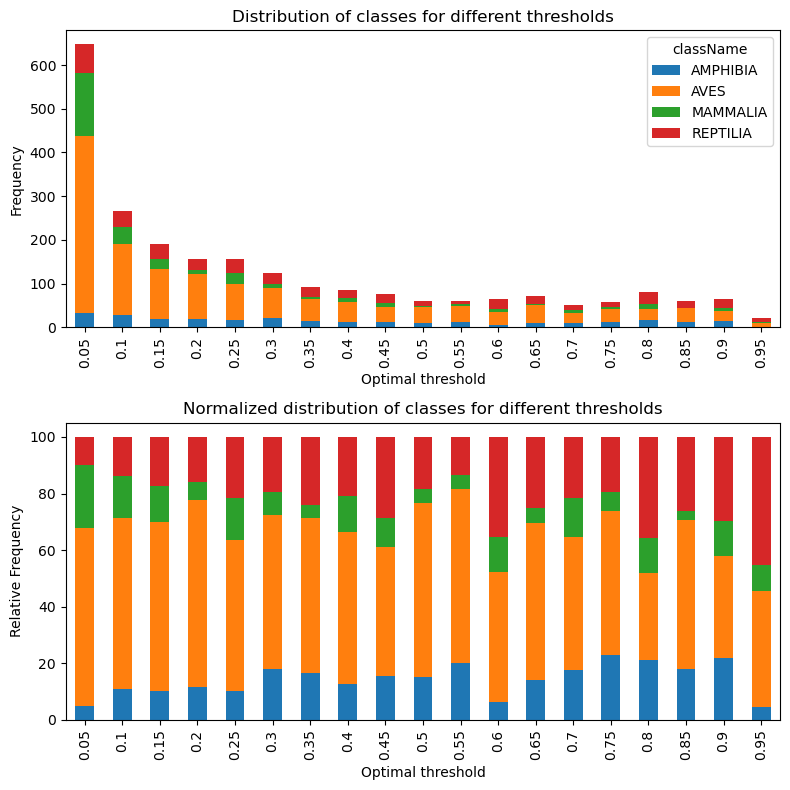

In [18]:
# Plot stacked bar chart
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

x_labels_array_rounded = [round(value, 2) for value in linspace_values]


# Stacked bar chart for 'Column1'
result.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Distribution of classes for different thresholds')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(x_labels_array_rounded, rotation=90)
ax[0].set_xlabel('Optimal threshold')



# Stacked bar chart for 'Column2'
result_norm.plot(kind='bar', stacked=True, ax=ax[1], legend=False)
ax[1].set_title('Normalized distribution of classes for different thresholds')
ax[1].set_ylabel('Relative Frequency')
ax[1].set_xticklabels(x_labels_array_rounded, rotation=90)
ax[1].set_xlabel('Optimal threshold')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

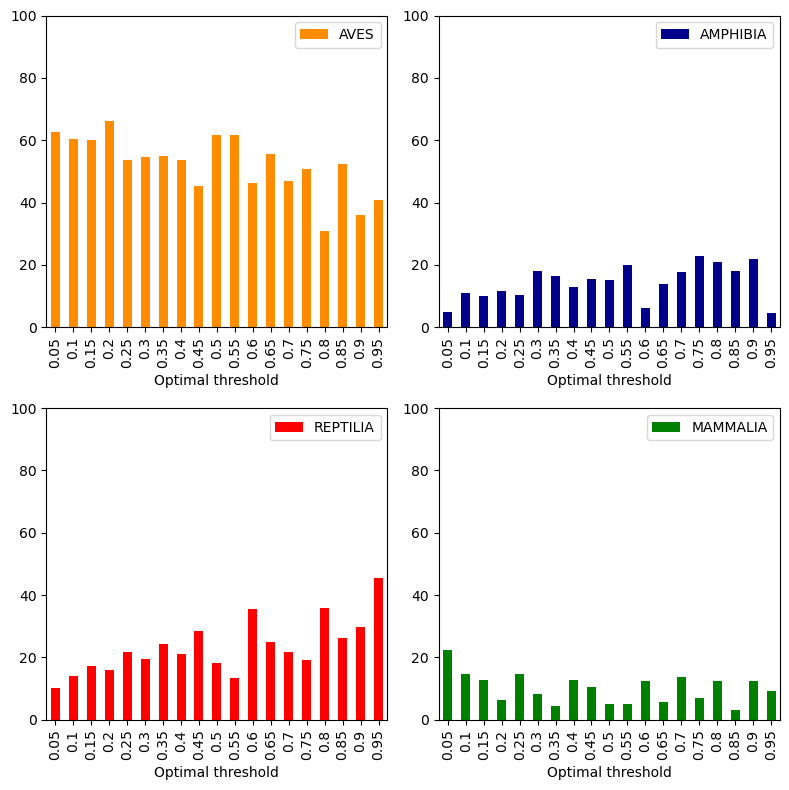

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

result_norm.plot(ax=ax[0][0],kind='bar', y='AVES', color='darkorange')
result_norm.plot(ax=ax[0][1],kind='bar', y='AMPHIBIA', color='darkblue')
result_norm.plot(ax=ax[1][0],kind='bar', y='REPTILIA', color='red')
result_norm.plot(ax=ax[1][1],kind='bar', y='MAMMALIA', color='green')

ax[0][0].set_xticklabels(x_labels_array_rounded, rotation=90)
ax[0][1].set_xticklabels(x_labels_array_rounded, rotation=90)
ax[1][0].set_xticklabels(x_labels_array_rounded, rotation=90)
ax[1][1].set_xticklabels(x_labels_array_rounded, rotation=90)

ax[0][0].set_xlabel('Optimal threshold')
ax[0][1].set_xlabel('Optimal threshold')
ax[1][0].set_xlabel('Optimal threshold')
ax[1][1].set_xlabel('Optimal threshold')

ax[0][0].set_ylim(0,100)
ax[0][1].set_ylim(0,100)
ax[1][0].set_ylim(0,100)
ax[1][1].set_ylim(0,100)

plt.tight_layout()
plt.show()

### by num training samples

In [20]:
geo_prior_df = pd.read_csv('../../data/train/geo_prior_train.csv')

In [21]:
species_counts = geo_prior_df.groupby(["taxon_id"]).size().to_frame().rename(columns={0: 'count'}).reset_index()

In [22]:
species_counts['count'] = species_counts['count'].clip(upper=1000)

In [23]:
species_counts = species_counts[species_counts['taxon_id'].isin(taxa_ids)]
species_counts['opt_thresh'] = per_species_f1_lin.argmax(axis=1)
species_counts['count'] = (species_counts['count'] / 100).round() * 100
results_norm_count = species_counts.groupby('opt_thresh')["count"].value_counts(normalize=True).unstack() * 100

In [24]:
results_norm_count

count,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0
opt_thresh,,,,,,,,,,,
0,0.610687,37.557252,15.725191,7.786260,5.801527,3.664122,2.595420,3.206107,2.137405,1.068702,19.847328
1,0.375940,36.842105,15.413534,5.639098,4.511278,4.887218,2.631579,2.631579,2.631579,1.127820,23.308271
2,3.608247,39.175258,17.010309,9.278351,5.154639,2.061856,1.546392,2.061856,NaN,0.515464,19.587629
3,NaN,36.708861,16.455696,8.227848,7.594937,5.063291,3.797468,1.898734,1.898734,2.531646,15.822785
4,0.625000,43.750000,11.250000,8.750000,7.500000,2.500000,3.125000,1.250000,0.625000,3.750000,16.875000
5,1.612903,37.903226,11.290323,7.258065,3.225806,4.838710,2.419355,4.032258,1.612903,4.838710,20.967742
6,NaN,40.217391,9.782609,10.869565,8.695652,6.521739,2.173913,2.173913,NaN,1.086957,18.478261
7,NaN,48.863636,13.636364,5.681818,3.409091,3.409091,NaN,1.136364,2.272727,1.136364,20.454545
8,1.282051,38.461538,14.102564,6.410256,2.564103,1.282051,5.128205,5.128205,NaN,1.282051,24.358974


[Text(0, 0, '0.05'),
 Text(1, 0, '0.1'),
 Text(2, 0, '0.15'),
 Text(3, 0, '0.2'),
 Text(4, 0, '0.25'),
 Text(5, 0, '0.3'),
 Text(6, 0, '0.35'),
 Text(7, 0, '0.4'),
 Text(8, 0, '0.45'),
 Text(9, 0, '0.5'),
 Text(10, 0, '0.55'),
 Text(11, 0, '0.6'),
 Text(12, 0, '0.65'),
 Text(13, 0, '0.7'),
 Text(14, 0, '0.75'),
 Text(15, 0, '0.8'),
 Text(16, 0, '0.85'),
 Text(17, 0, '0.9'),
 Text(18, 0, '0.95')]

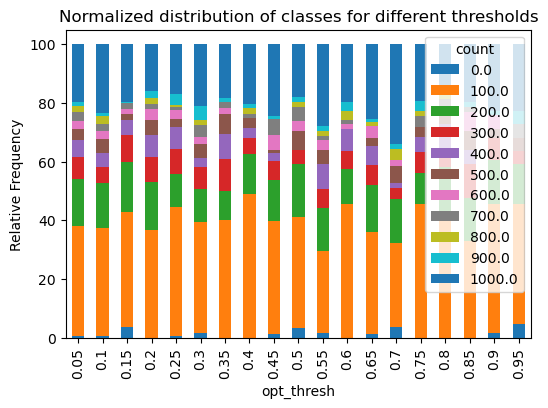

In [25]:
fix, ax = plt.subplots(1,1, figsize=(6,4))
results_norm_count.plot(kind='bar', stacked=True, ax=ax, legend=True)
ax.set_title('Normalized distribution of classes for different thresholds')
ax.set_ylabel('Relative Frequency')
ax.set_xticklabels(x_labels_array_rounded, rotation=90)

### geo prediction colour coding

#### 1st way

In [26]:
import pickle
with open('../../output/species_continents.pkl', 'rb') as fp:
    continent_df = pickle.load(fp)
continent_df['continent'] = continent_df['continent'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
continent_df['opt_thresh'] = per_species_f1_lin.argmax(axis=1)

In [27]:
continent_df

,speciesID,continent,opt_thresh
0,17090,South America,2
1,18938,South America,1
2,17556,Africa,2
3,18295,South America,1
4,14152,Australia,3
...,...,...,...
2413,1368519,South America,4
2414,1367368,Africa,8
2415,1369291,South America,9
2416,1369292,South America,8


In [28]:
result_cont = continent_df.groupby('opt_thresh')['continent'].value_counts(normalize=False).unstack() #* 100
result_norm_cont = continent_df.groupby('opt_thresh')['continent'].value_counts(normalize=True).unstack() * 100


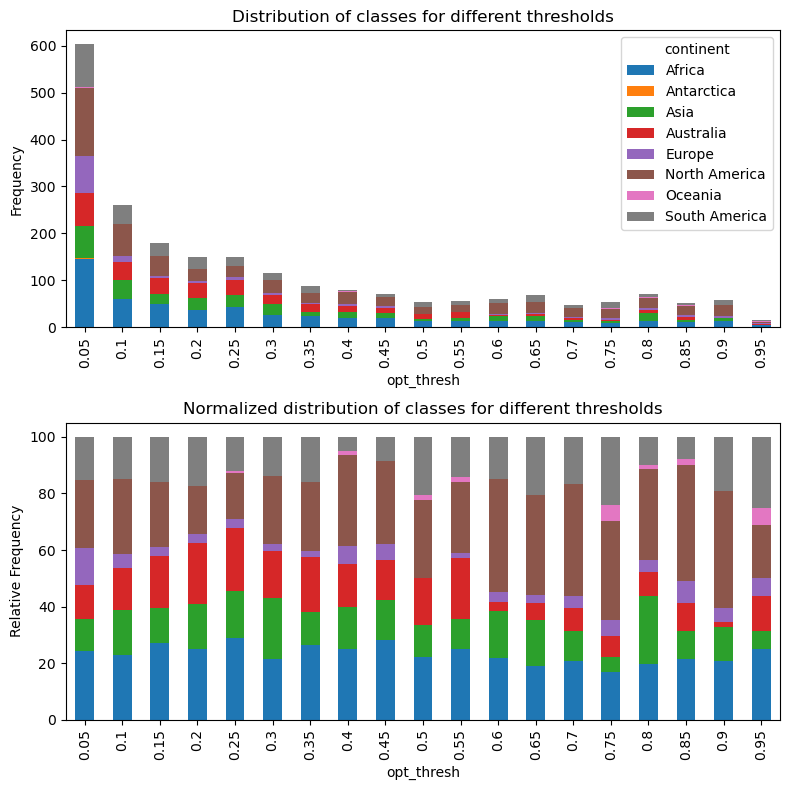

In [29]:
# Plot stacked bar chart
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

x_labels_array_rounded = [round(value, 2) for value in linspace_values]


# Stacked bar chart for 'Column1'
result_cont.plot(kind='bar', stacked=True, ax=ax[0])
ax[0].set_title('Distribution of classes for different thresholds')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(x_labels_array_rounded, rotation=90)


# Stacked bar chart for 'Column2'
result_norm_cont.plot(kind='bar', stacked=True, ax=ax[1], legend=False)
ax[1].set_title('Normalized distribution of classes for different thresholds')
ax[1].set_ylabel('Relative Frequency')
ax[1].set_xticklabels(x_labels_array_rounded, rotation=90)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

#### 2nd way

In [30]:
import umap
import umap.plot

lowres_df = pd.read_csv('../../output/lowres_pred.csv', index_col=0)


/Users/filipdorm/opt/anaconda3/envs/sinr_icml/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/filipdorm/opt/anaconda3/envs/sinr_icml/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


0.0


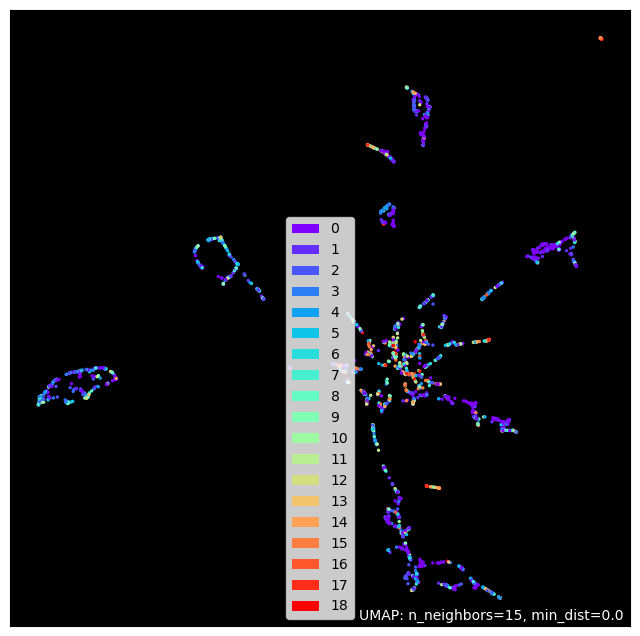

0.1


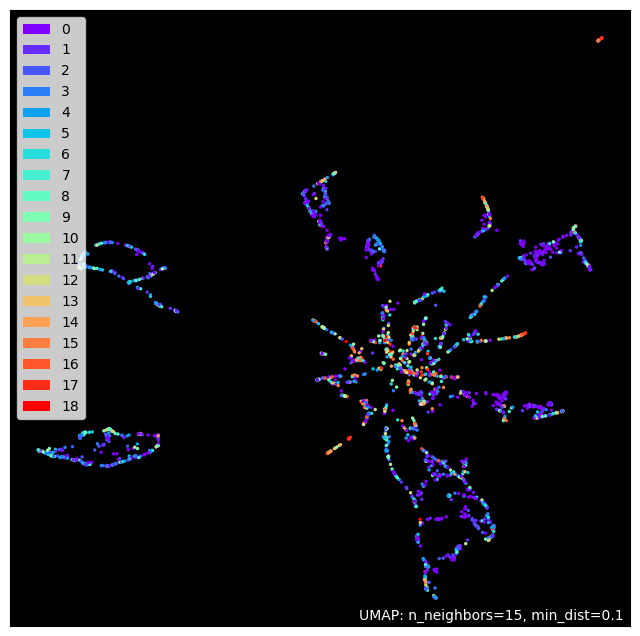

0.25


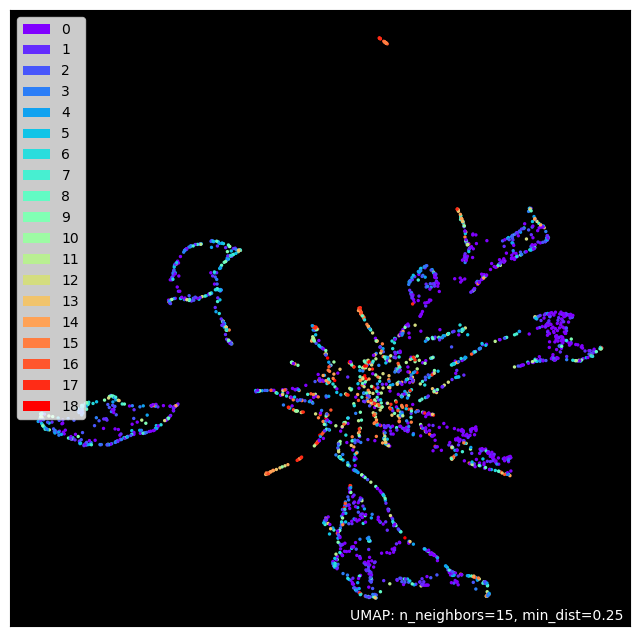

0.5


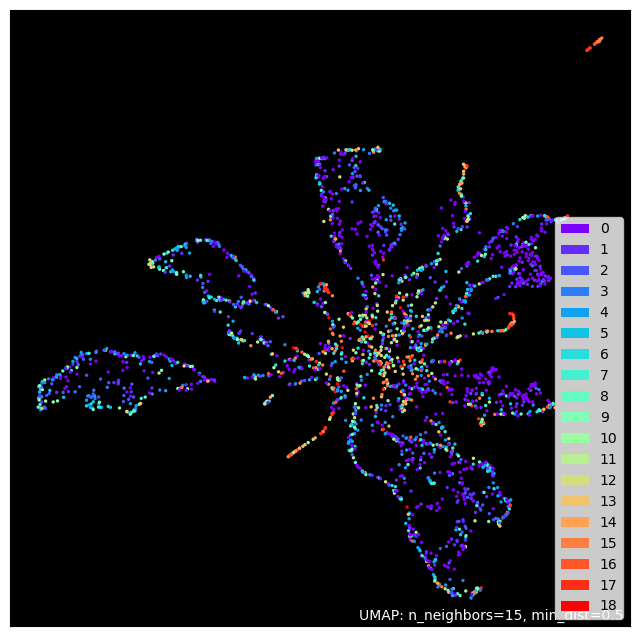

0.8


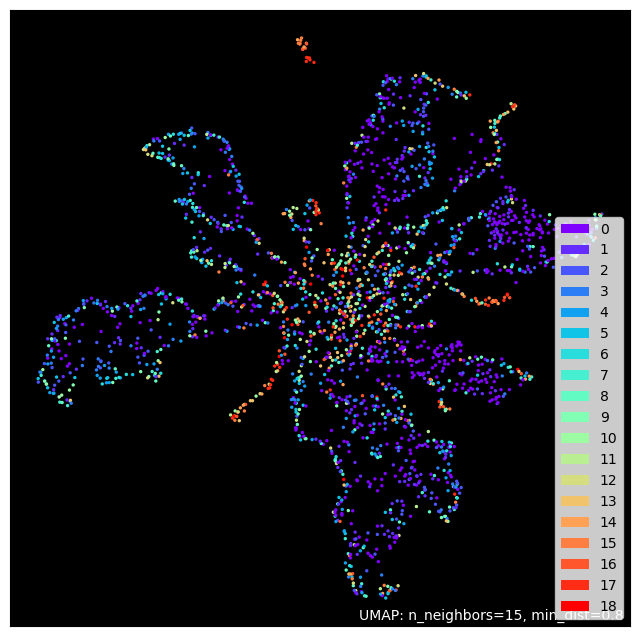

0.99


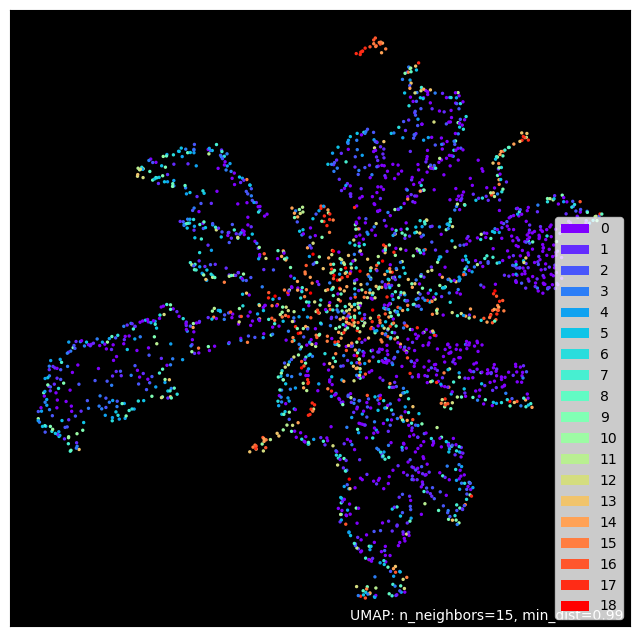

In [31]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    mapper = umap.UMAP(min_dist=d).fit(lowres_df)
    print(d)
    umap.plot.points(mapper, labels=per_species_f1_lin.argmax(axis=1), theme='fire')
    plt.show()



/Users/filipdorm/opt/anaconda3/envs/sinr_icml/lib/python3.9/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


0.99


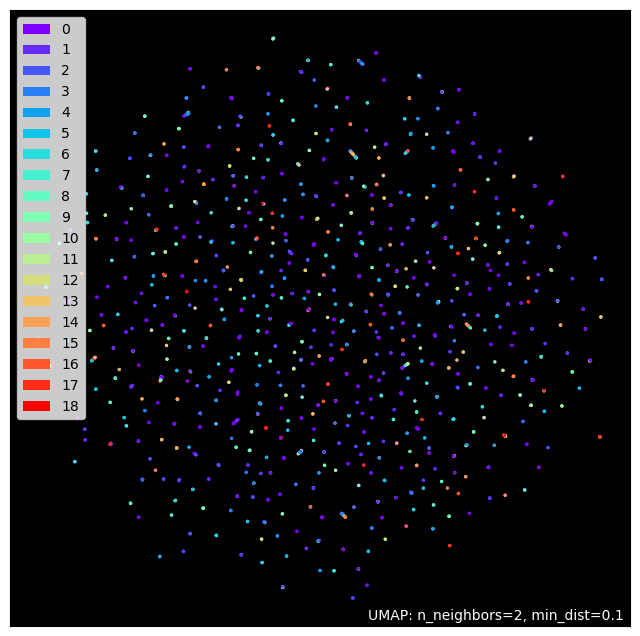

0.99


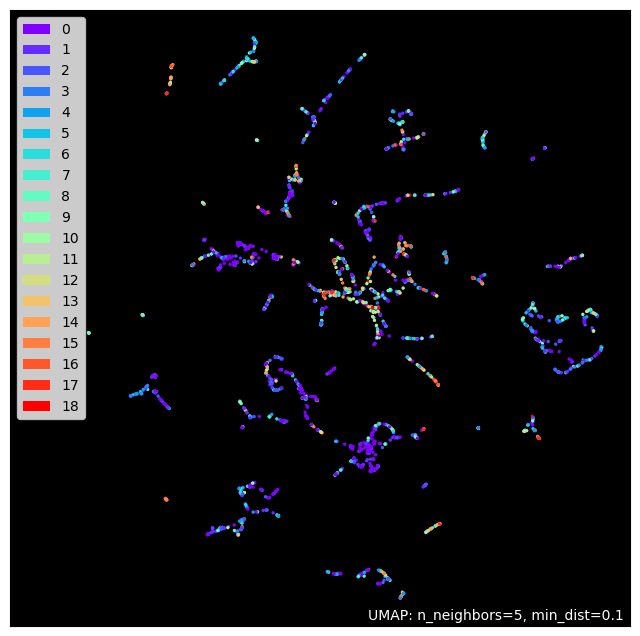

0.99


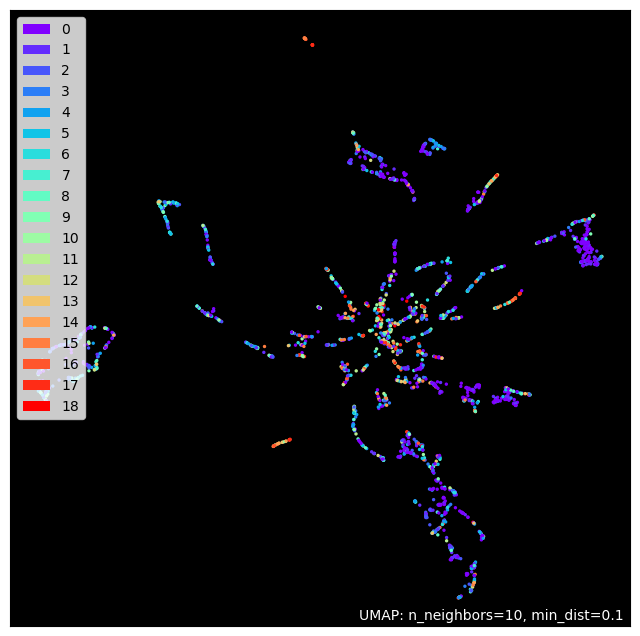

0.99


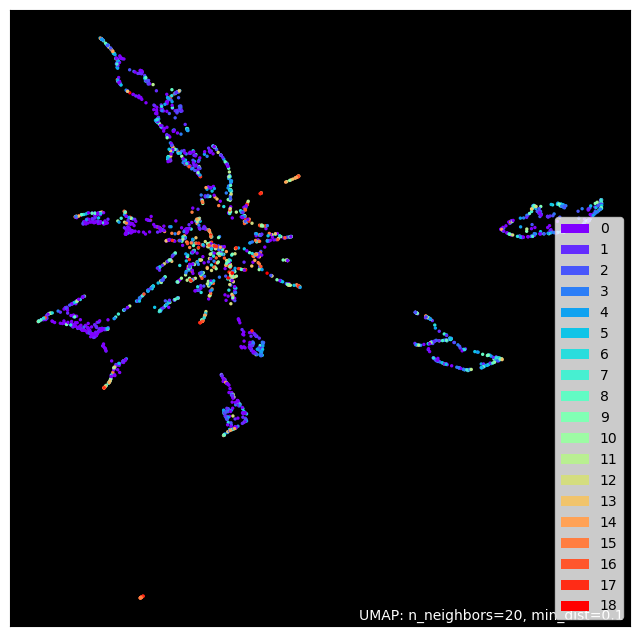

0.99


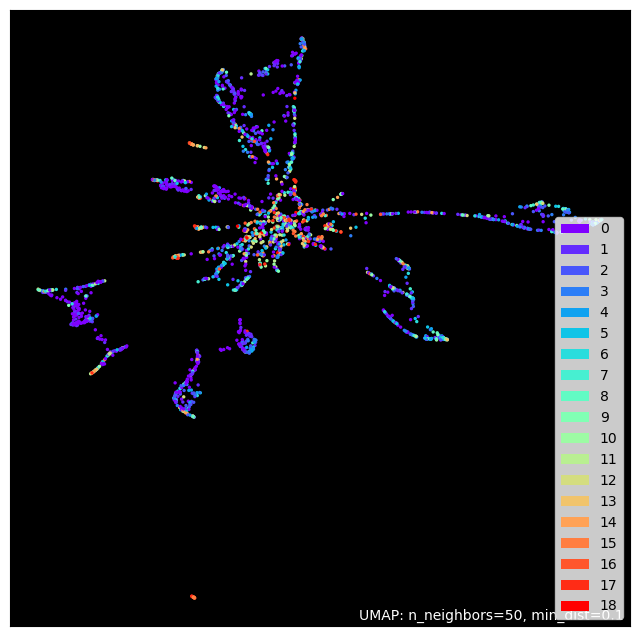

0.99


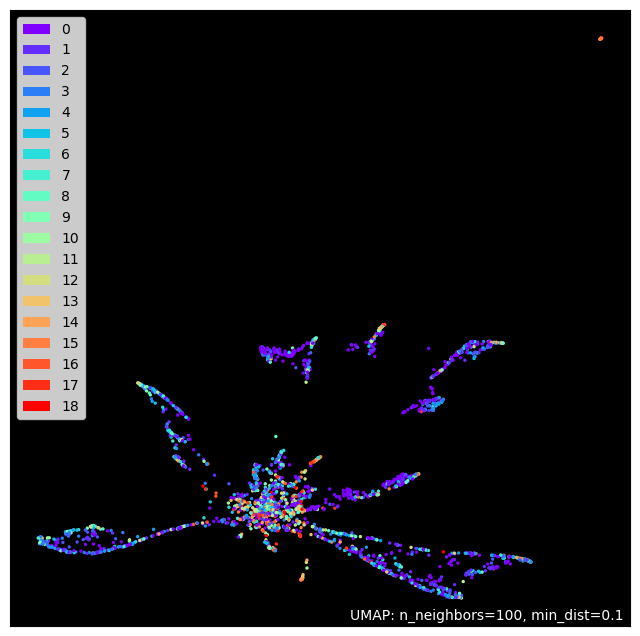

0.99


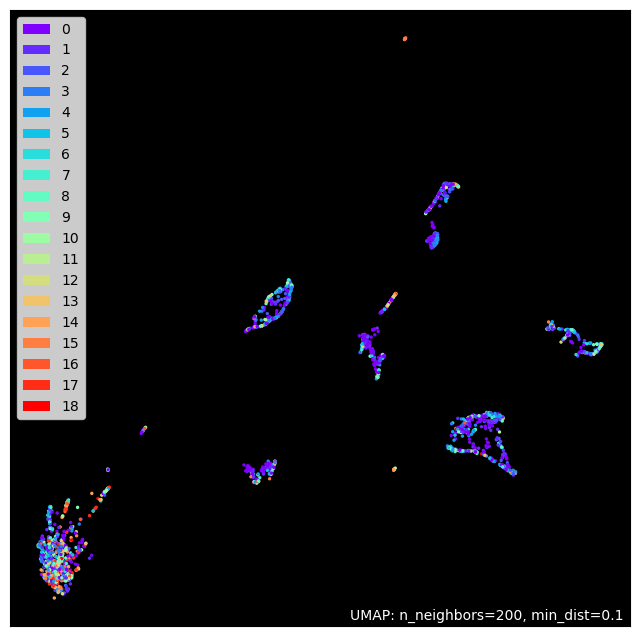

In [32]:
for n in (2, 5, 10, 20, 50, 100, 200):
    mapper = umap.UMAP(n_neighbors=n).fit(lowres_df)
    print(d)
    umap.plot.points(mapper, labels=per_species_f1_lin.argmax(axis=1), theme='fire')
    plt.show()